# TODO: Load preprocessed files
I removed the preprocessing from this file to spread responsibility, sorry if this is inconvenient

## Since I filled all NaNs with 0, the ones in EventDay also became 0. But before, '0' in EventDay meant the day of excacerbation. That is why '0' meant something important in EventDay. So, everything that was NaN in that column, was unimportant and has to be far from 0 (I put 200)

In [26]:
# Replace all 0's with 200
asthma_df.loc[asthma_df['EventDay'] == 0, 'EventDay'] = 200

# Find the indices of -1 and 1
idx_minus_one = asthma_df.index[asthma_df['EventDay'].shift(1).between(-1, 0)]
idx_one = asthma_df.index[asthma_df['EventDay'].shift(-1).between(0, 1)]

# Find the indices of 0 that are between -1 and 1
idx_between = asthma_df.index[(asthma_df['EventDay'] == 200) & asthma_df.index.isin(idx_minus_one) & asthma_df.index.isin(idx_one)]

# Replace the 0's between -1 and 1 with 0
asthma_df.loc[idx_between, 'EventDay'] = 0
asthma_df['EventDay'].iloc[968:988]

968    200.0
969    200.0
970    200.0
971     -7.0
972     -6.0
973     -5.0
974     -4.0
975     -3.0
976     -2.0
977     -1.0
978      0.0
979      1.0
980      2.0
981      3.0
982      4.0
983      5.0
984      6.0
985      7.0
986    200.0
987    200.0
Name: EventDay, dtype: float64

## PCA because we have a lot of features

In [45]:
asthma_df_temp = asthma_df.drop('EventDay', axis = 1)
asthma_df_temp.head()

,Unnamed: 0,SubjectNr,DayNo,stepsTotalDaily,stepsTotalDetailed,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR05Perc,HR95Perc,HrAvgWake,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,awakeDuration,lightSleepDuration,deepSleepDuration,wakeUpCount,HRAvgSleep,HRMinSleep,HRMaxSleep,activity_score_parent,activity_score_child,sleep_score_child,sleeptime,waketime,fvc_best,fev1_best,pef_best,Technique,fev1_ratio_best,fev1_percentage,fvc1_percentage,fev1_ratio_percentage,ACD1,ACD2,ACD3,ACD4,ACD5,ACD6,ACD6_use,ACD6score,BASELINE_ACQ6_score,EOS_ACQ6_score,BASELINE_physical_tot,EOS_physical_tot,BASELINE_emotional_tot,EOS_emotional_tot,BASELINE_school_tot,EOS_school_tot,BASELINE_bodyimage_tot,EOS_bodyimage_tot,BASELINE_treatmentburden_tot,EOS_treatmentburden_tot,BASELINE_health_tot,EOS_health_tot,BASELINE_weight_tot,EOS_weight_tot,BASELINE_respiratory_tot,EOS_respiratory_tot,BASELINE_digestion_tot,EOS_digestion_tot,BASELINE_PAQLQ_total,EOS_PAQLQ_total,BASELINE_PAQLQ_activity,EOS_PAQLQ_activity,BASELINE_PAQLQ_symptoms,EOS_PAQLQ_symptoms,BASELINE_PAQLQ_emotion,EOS_PAQLQ_emotion,PedsQL_score_baseline,EOS_PedsQL_score,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,pollenTotal,NO,NO2,Nox,O3,Ox,PM10,PM25,Symptomscore,Admission_LY,Age,AgeDiagnosis,BirthMonth,BirthYear,BMI,BMI_SDS,DayCare,Dis_Chronic,Eosinophils,height,Hosp_treatme,Hospital_Trt,SchoolYear,Serum_IgE,Vaccination,weight,Urbanisation,totalSleepDuration,wear00,wear01,wear02,wear03,wear04,wear05,wear06,wear07,wear08,wear09,wear10,wear11,wear12,wear13,wear14,wear15,wear16,wear17,wear18,wear19,wear20,wear21,wear22,wear23,wear24H,wear16H,steps15_19,week,steps_hour_max,AVGHR_daily,AVGHR_wake,AVGHR_sleep,wear05H,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,dayType_holiday,dayType_school,dayType_weekend,school_yes_no_no,school_yes_no_yes,screentime_0-30 min,screentime_0.5-1 hours,screentime_1-2 hours,screentime_2-4 hours,screentime_> 4 hours,grade_fev1_A,grade_fev1_B,grade_fev1_C,grade_fev1_D,grade_fev1_E,grade_fev1_F,grade_fev1_U,grade_fvc_A,grade_fvc_B,grade_fvc_C,grade_fvc_D,grade_fvc_E,grade_fvc_F,grade_fvc_U,AllergicRhin_No,AllergicRhin_Yes,AtopicAsthma_No,AtopicAsthma_Yes,CF_Asthma_Controlled asthma,CF_Asthma_Cystic Fibrosis,CF_Asthma_Uncontrolled asthma,DailyActiv_2,DailyActiv_2x a week fitness,DailyActiv_M,DailyActiv_School,DailyActiv_School and sports,DailyActiv_School sports,DailyActiv_School.,DailyActiv_football bassball on regular basis,DailyActiv_guitar soccar school,DailyActiv_hockey and tennis 3x 1x,DailyActiv_ice skating skating tennis every day,DailyActiv_school,DailyActiv_school fitkids,DailyActiv_school sports,DailyActiv_school tennis,DailyActiv_school sports,DailyActiv_sports school,ExerciseSymp_No,ExerciseSymp_Yes,Family_his_No,Family_his_Yes,sex_Female,sex_Male,ICS_No,ICS_Yes,LABA_No,LABA_Yes,Leukotri_Mod_No,Leukotri_Mod_Yes,Monoclonals_No,Monoclonals_Yes,Oral_Steroid_No,Oral_Steroid_Yes,OtherClass_No,OtherClass_Yes,PancrInsuffi_No,PancrInsuffi_Yes,PetsHome_No,PetsHome_Yes,Pseudomonas_No,Pseudomonas_Yes,SABA_Yes,SmokeHome_No,SmokeHome_Yes,sportsyesno_No,sportsyesno_Yes,urbanisation_Extremely urbanised,urbanisation_Not extremely urbanised,CONDITION_Controlled asthma,CONDITION_Cystic Fibrosis,CONDITION_Uncontrolled asthma
0,1,1771258,0,3723.0,3723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,137.0,0.0,0.0,605.0,1640.0,0.0,82.0,451.0,245.0,135.0,160.0,164.0,41.0,0.0,68.0,120.0,8.689362e+09,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.00,0.0,0.0,0.00,0.0,89.8,83.4,87.8,91.5,93.30,77.1,78.6,660.0,16800.0,16440.0,1.0,75.0,61.0,93.0,0.0,0.0,0.0,0.0,0.0,3232.0,2381.0,4334.00,3.0,0.736696,0.726555,0.877857,0.822316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,2.666667e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

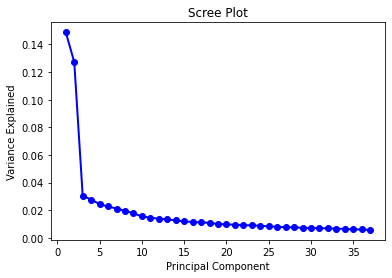

In [47]:
from sklearn.preprocessing import StandardScaler

#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=asthma_df_temp.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

from sklearn.decomposition import PCA
n = 37
#define PCA model to use
pca = PCA(n_components=n)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

#print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [48]:
import numpy as np

cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
print('How much variance is explained by', n, 'components: ', cumulative_var_ratio[n-1])

# Choose the number of principal components to retain
num_components = n

# Apply PCA transformation to original data
pca_transformed = pca_fit.transform(scaled_df)[:, :num_components]

# Create a new dataframe from transformed data
pca_df = pd.DataFrame(data=pca_transformed, columns=[f"PC{i+1}" for i in range(num_components)])
pca_df.head(5)

How much variance is explained by 37 components:  0.7049111319589249


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37
0,9.121066,1.033715,-7.947336,1.457726,1.940378,-1.317506,-0.190600,-3.273366,-0.507005,-0.458054,-0.938336,-2.782555,1.159356,-1.419818,1.075915,0.475738,0.459404,0.356845,-0.034824,-2.456938,2.456743,1.442951,0.703171,-1.986355,-0.887294,-0.983150,-1.227200,0.269896,1.700501,-1.496089,0.175328,-0.223981,-2.324125,-3.011052,-0.376307,0.678537,-0.477404
1,-1.501339,-6.797329,-2.508306,-0.610137,-1.312261,-1.534154,1.420324,0.545927,-2.272853,0.028323,-2.651877,-2.406198,1.266013,-1.609805,0.451321,0.134569,3.272106,1.650837,-1.486143,-1.480936,-0.478845,1.382806,0.232010,-0.452046,-0.497110,0.934197,-0.814877,1.470162,2.098822,-0.050885,-1.876237,-1.688247,-1.746970,-1.949502,-1.038635,0.666394,0.571425
2,-0.236810,-6.624919,-0.606750,1.238523,0.282165,-3.205543,-0.470684,-0.052344,-0.712278,-2.138990,-1.347889,-4.016843,0.827337,-1.073819,1.632852,-1.003893,0.354872,0.022668,0.162272,-1.320847,0.778333,2.042960,0.663882,-1.524674,-2.383478,-2.010106,-1.647628,0.011774,0.846675,-0.545940,-0.670657,-0.677156,-2.765033,-1.427914,-1.118731,-0.253504,0.155534
3,-0.207351,-6.264618,-0.778213,1.344188,1.316712,-3.242146,-0.563649,-0.633022,-1.826083,-1.886808,-1.185258,-3.308620,0.857403,-0.693702,1.361786,-1.091279,0.499263,-0.184336,0.241335,-2.033219,1.045904,1.982866,0.968563,-1.639048,-1.973597,-1.747210,-2.197517,0.646514,1.027481,0.016607,-0.454718,0.110371,-2.562820,-1.383899,-0.681365,0.390874,-0.226014
4,0.624242,-5.571856,0.198127,1.393690,-2.747482,-3.113340,-0.372680,-1.674279,-1.833263,1.363914,-1.125284,-1.259288,0.116793,-0.353536,2.014883,-0.958775,0.417547,-1.613224,0.299479,-2.167474,1.301896,2.385979,0.778069,-2.081393,-1.677005,-1.997030,-3.451603,0.690193,0.852182,-0.799952,-0.631258,-0.380834,-2.431634,-1.592113,-0.853501,0.039160,-0.045598


- drop eventDay for fitting and predicting and analyze which rows are outliers
- turn eventday in 0s and 1s, drop the rows with 1s for fitting, include the whole df (with both 0s and 1s) in predicting (not nice)

In [49]:
from sklearn.svm import OneClassSVM

# Initialize the OSVM model with hyperparameters
osvm = OneClassSVM(kernel='rbf', nu=0.01, gamma=0.002)

# Fit the OSVM model to the transformed data
osvm.fit(pca_df)

# Predict the outliers on the transformed data
outlier_preds = osvm.predict(pca_df)

# Add the outlier predictions as a new column to the original dataframe
scaled_df['outlier'] = outlier_preds

# Print the count of outliers in the dataset
print(f"Number of outliers detected: {len(scaled_df[scaled_df['outlier'] == -1])}")

# Add outlier predictions as a new column to the scaled_df dataframe
scaled_df_new = scaled_df.assign(outlier_preds=outlier_preds)

# Merge outlier predictions column with the original dataframe based on a common column
merged_df = asthma_df.merge(scaled_df_new[['outlier_preds']], left_index=True, right_index=True)

Number of outliers detected: 28


In [50]:
outliers_df = merged_df[merged_df['outlier_preds'] == -1]
outliers_df[['SubjectNr', 'DayNo', 'EventDay']]

,SubjectNr,DayNo,EventDay
219,4484964,16,200.0
404,1353701,27,200.0
835,1438514,23,200.0
869,2450908,28,200.0
883,7190055,13,200.0
886,7190055,16,200.0
890,7190055,20,200.0
918,3175094,19,200.0
1342,5461205,8,200.0
1356,5461205,22,200.0


In [51]:
# 1137963
asthma_df[asthma_df['SubjectNr'] == 4484964]

,Unnamed: 0,SubjectNr,DayNo,stepsTotalDaily,stepsTotalDetailed,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR05Perc,HR95Perc,HrAvgWake,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,awakeDuration,lightSleepDuration,deepSleepDuration,wakeUpCount,HRAvgSleep,HRMinSleep,HRMaxSleep,activity_score_parent,activity_score_child,sleep_score_child,sleeptime,waketime,fvc_best,fev1_best,pef_best,Technique,fev1_ratio_best,fev1_percentage,fvc1_percentage,fev1_ratio_percentage,ACD1,ACD2,ACD3,ACD4,ACD5,ACD6,ACD6_use,ACD6score,BASELINE_ACQ6_score,EOS_ACQ6_score,BASELINE_physical_tot,EOS_physical_tot,BASELINE_emotional_tot,EOS_emotional_tot,BASELINE_school_tot,EOS_school_tot,BASELINE_bodyimage_tot,EOS_bodyimage_tot,BASELINE_treatmentburden_tot,EOS_treatmentburden_tot,BASELINE_health_tot,EOS_health_tot,BASELINE_weight_tot,EOS_weight_tot,BASELINE_respiratory_tot,EOS_respiratory_tot,BASELINE_digestion_tot,EOS_digestion_tot,BASELINE_PAQLQ_total,EOS_PAQLQ_total,BASELINE_PAQLQ_activity,EOS_PAQLQ_activity,BASELINE_PAQLQ_symptoms,EOS_PAQLQ_symptoms,BASELINE_PAQLQ_emotion,EOS_PAQLQ_emotion,PedsQL_score_baseline,EOS_PedsQL_score,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,pollenTotal,NO,NO2,Nox,O3,Ox,PM10,PM25,Symptomscore,Admission_LY,Age,AgeDiagnosis,BirthMonth,BirthYear,BMI,BMI_SDS,DayCare,Dis_Chronic,Eosinophils,height,Hosp_treatme,Hospital_Trt,SchoolYear,Serum_IgE,Vaccination,weight,Urbanisation,totalSleepDuration,wear00,wear01,wear02,wear03,wear04,wear05,wear06,wear07,wear08,wear09,wear10,wear11,wear12,wear13,wear14,wear15,wear16,wear17,wear18,wear19,wear20,wear21,wear22,wear23,wear24H,wear16H,steps15_19,week,steps_hour_max,AVGHR_daily,AVGHR_wake,AVGHR_sleep,EventDay,wear05H,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,dayType_holiday,dayType_school,dayType_weekend,school_yes_no_no,school_yes_no_yes,screentime_0-30 min,screentime_0.5-1 hours,screentime_1-2 hours,screentime_2-4 hours,screentime_> 4 hours,grade_fev1_A,grade_fev1_B,grade_fev1_C,grade_fev1_D,grade_fev1_E,grade_fev1_F,grade_fev1_U,grade_fvc_A,grade_fvc_B,grade_fvc_C,grade_fvc_D,grade_fvc_E,grade_fvc_F,grade_fvc_U,AllergicRhin_No,AllergicRhin_Yes,AtopicAsthma_No,AtopicAsthma_Yes,CF_Asthma_Controlled asthma,CF_Asthma_Cystic Fibrosis,CF_Asthma_Uncontrolled asthma,DailyActiv_2,DailyActiv_2x a week fitness,DailyActiv_M,DailyActiv_School,DailyActiv_School and sports,DailyActiv_School sports,DailyActiv_School.,DailyActiv_football bassball on regular basis,DailyActiv_guitar soccar school,DailyActiv_hockey and tennis 3x 1x,DailyActiv_ice skating skating tennis every day,DailyActiv_school,DailyActiv_school fitkids,DailyActiv_school sports,DailyActiv_school tennis,DailyActiv_school sports,DailyActiv_sports school,ExerciseSymp_No,ExerciseSymp_Yes,Family_his_No,Family_his_Yes,sex_Female,sex_Male,ICS_No,ICS_Yes,LABA_No,LABA_Yes,Leukotri_Mod_No,Leukotri_Mod_Yes,Monoclonals_No,Monoclonals_Yes,Oral_Steroid_No,Oral_Steroid_Yes,OtherClass_No,OtherClass_Yes,PancrInsuffi_No,PancrInsuffi_Yes,PetsHome_No,PetsHome_Yes,Pseudomonas_No,Pseudomonas_Yes,SABA_Yes,SmokeHome_No,SmokeHome_Yes,sportsyesno_No,sportsyesno_Yes,urbanisation_Extremely urbanised,urbanisation_Not extremely urbanised,CONDITION_Controlled asthma,CONDITION_Cystic Fibrosis,CONDITION_Uncontrolled asthma
203,204,4484964,0,3706.0,3706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,1041.0,195.0,924.0,229.0,258.0,391.0,229.0,139.0,153.0,0.0,67.0,117.0,8.564384e+09,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,92.3,82.0,91.00,86.10,78.70,94.30,87.8,91.6,77.80,70.0,2460.0,20280.0,10740.0,6.0,67.0,58.0,101.0,0.0,0.0,0.0,0.0,0.0,2556.00,2229.0,4528.00,3.0,0.872066,1.111196e+09,1.095965e+09,1.009097e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.166667,0.833333,0.0,0.0,0.0,0.0,0.0,

In [42]:
df = asthma_df[asthma_df['SubjectNr'] == 1137963]

# count the number of zeros in each row
zero_counts = df.apply(lambda row: (row == 0).sum(), axis=1)

print(zero_counts)

58    150
59    124
60    107
61    108
62    106
63    109
64    112
65     99
66    100
67    109
68    100
69    125
70    120
71    113
72    102
73    105
74    109
75    116
76    125
77    134
78    101
79    102
80    123
81    128
82    108
83    109
84    104
85    152
86    192
dtype: int64
